<a href="https://colab.research.google.com/github/wizard339/education/blob/main/classification_keras_mnist_deep_dive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Визуализация активации в свёрточных нейронных сетях на примере распознавания чисел из датасета MNIST.

Визуализируем активации с помощью утилиты `keract`.

In [1]:
!pip install keract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import activations
from keract import get_activations, display_activations

In [3]:
# Различные константы
IMG_WIDTH, IMG_HEIGHT = 28, 28
BATCH_SIZE = 250
EPOCHS = 25
NUM_CLASSES = 10
VALIDATION_SPLIT = 0.2
VERBOSITY = 1

In [4]:
# Загружаем датасет MNIST.
(input_train, target_train), (input_test, target_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
# Подготавливаем данные.
input_train = input_train.reshape(input_train.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
input_test = input_test.reshape(input_test.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
input_shape = (IMG_WIDTH, IMG_HEIGHT, 1)

# Нормализуем данные (0-255 -> 0-1.0).
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')
input_train = input_train / 255
input_test = input_test / 255

target_train = tensorflow.keras.utils.to_categorical(target_train, NUM_CLASSES)
target_test = tensorflow.keras.utils.to_categorical(target_test, NUM_CLASSES)

In [ ]:
# Либо загружаем обученную модель.
#model = load_model("cnn_mnist_classification")

In [6]:
# Либо создаём модель.
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, kernel_size=(5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [7]:
# И обучаем её.
model.compile(
    loss=tensorflow.keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.fit(
    input_train,
    target_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSITY,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/25
192/192 [==============================] - 9s 6ms/step - loss: 0.4116 - accuracy: 0.8836 - val_loss: 0.1652 - val_accuracy: 0.9541
Epoch 2/25
192/192 [==============================] - 1s 5ms/step - loss: 0.1331 - accuracy: 0.9603 - val_loss: 0.1209 - val_accuracy: 0.9647
Epoch 3/25
192/192 [==============================] - 1s 5ms/step - loss: 0.0871 - accuracy: 0.9739 - val_loss: 0.0830 - val_accuracy: 0.9756
Epoch 4/25
192/192 [==============================] - 1s 5ms/step - loss: 0.0663 - accuracy: 0.9797 - val_loss: 0.0656 - val_accuracy: 0.9814
Epoch 5/25
192/192 [==============================] - 1s 4ms/step - loss: 0.0531 - accuracy: 0.9837 - val_loss: 0.0647 - val_accuracy: 0.9812
Epoch 6/25
192/192 [==============================] - 1s 4ms/step - loss: 0.0447 - accuracy: 0.9865 - val_loss: 0.0597 - val_accuracy: 0.9814
Epoch 7/25
192/192 [==============================] - 1s 5ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0597 - val_accuracy: 0.9834
Epoch 

In [8]:
# Сохраняем модель.
model.save("cnn_mnist_classification")

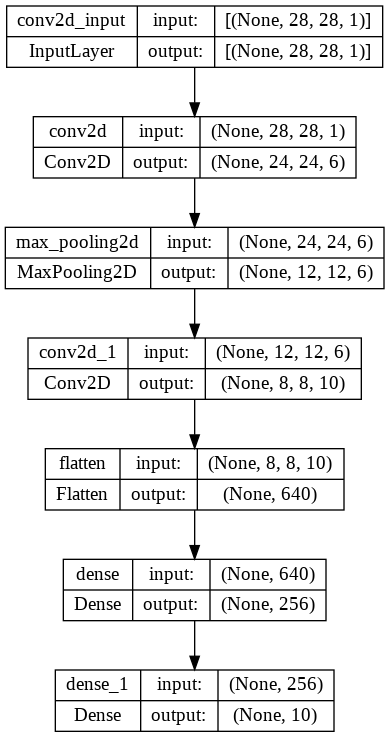

In [9]:
# Визуализируем модель.
plot_model(model, show_shapes = True)

conv2d_input (1, 28, 28, 1) 


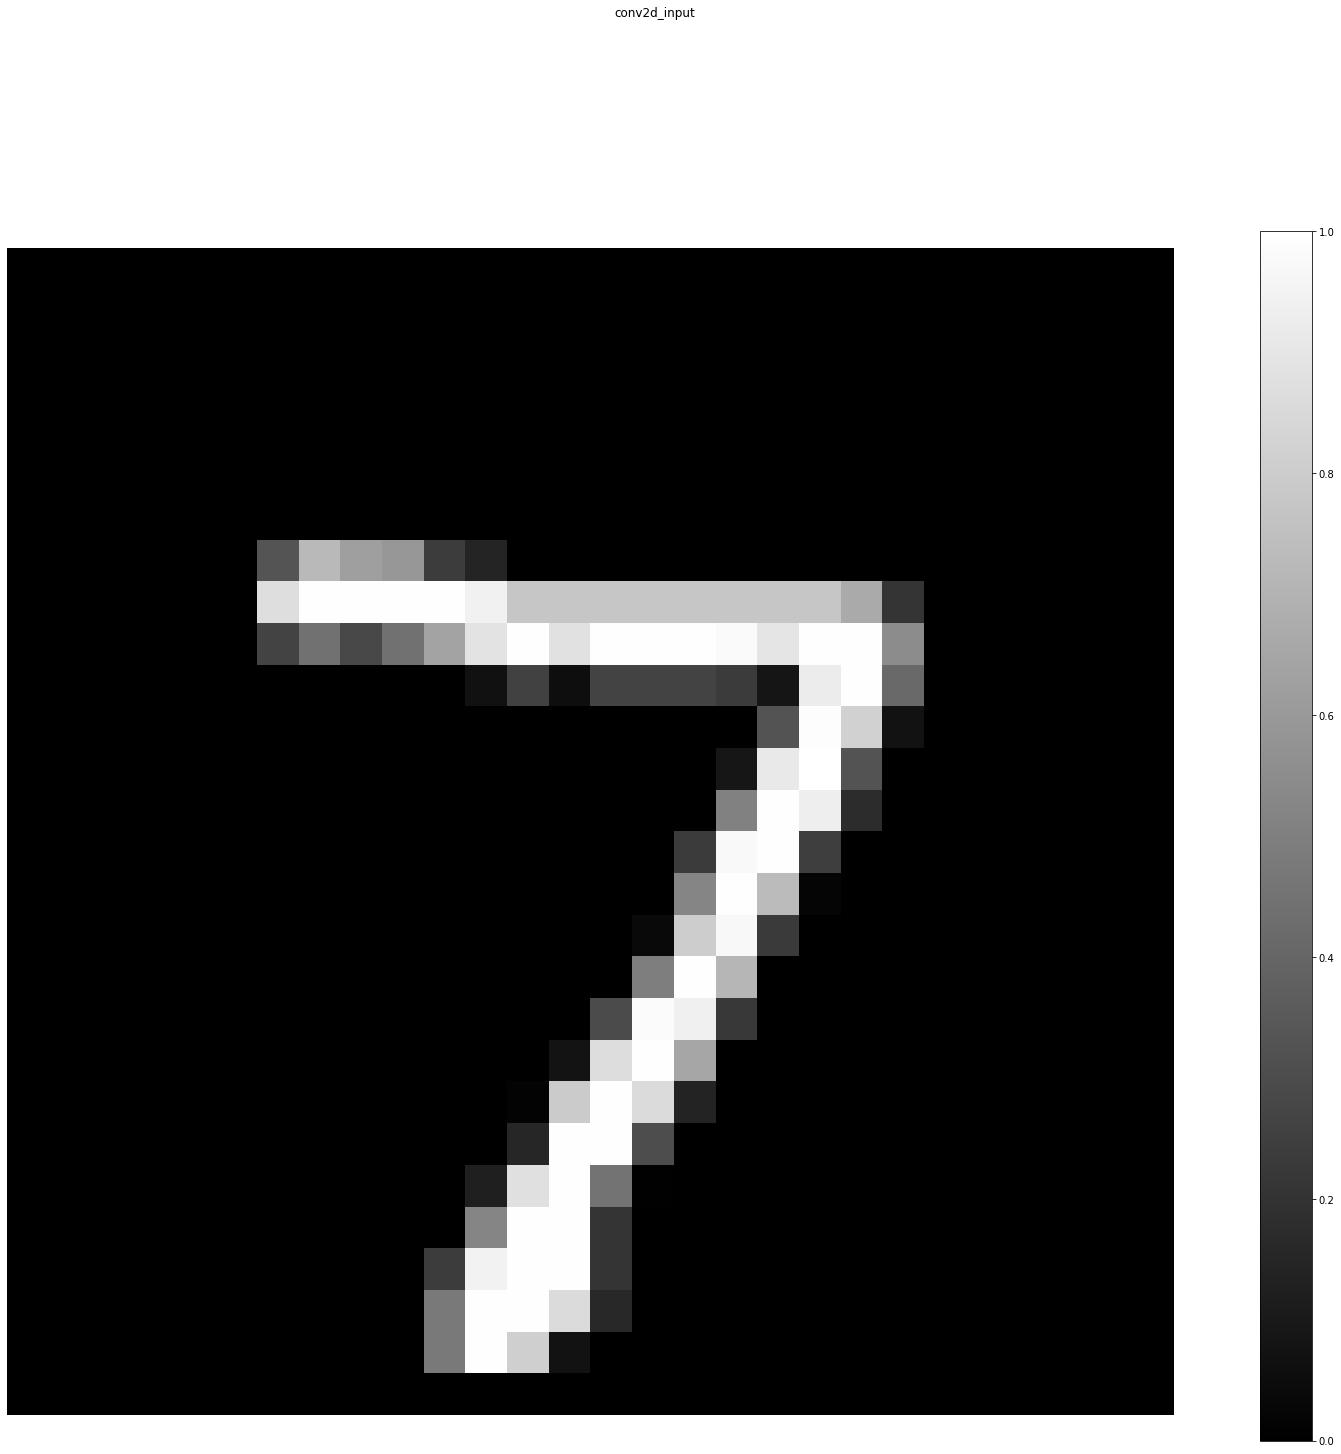

conv2d (1, 24, 24, 6) 


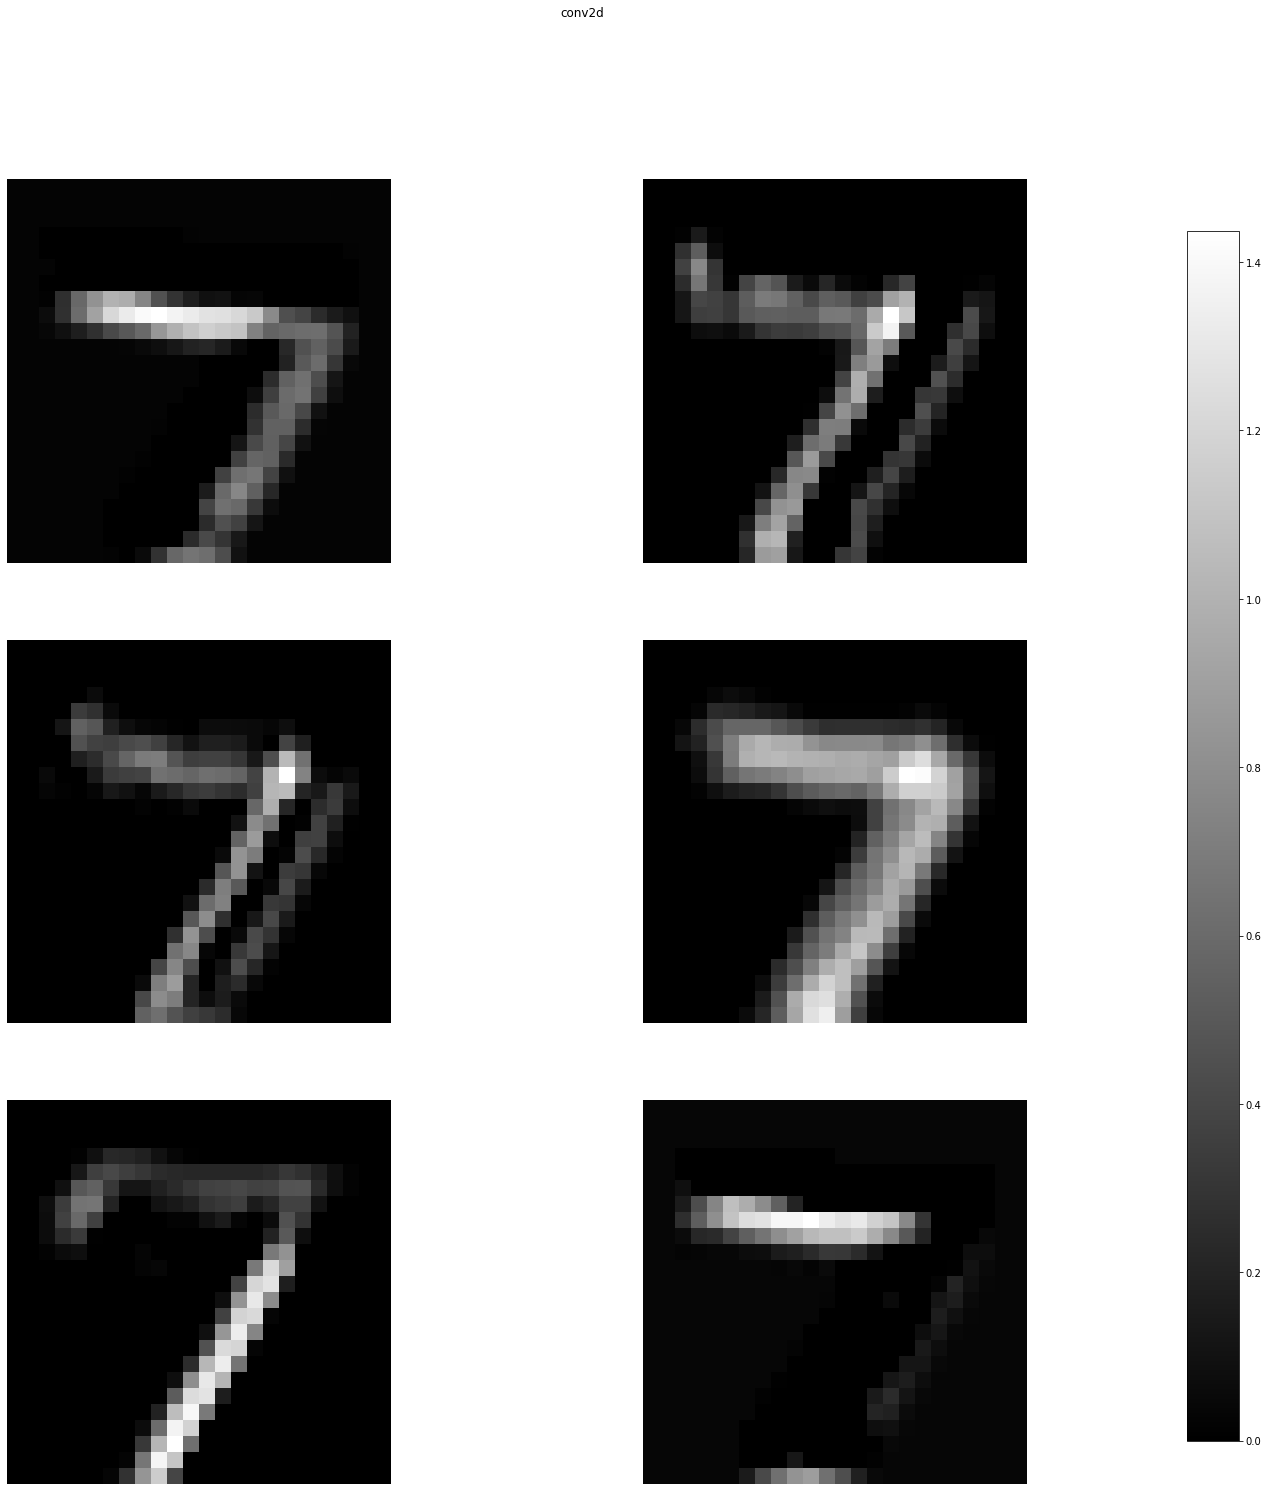

max_pooling2d (1, 12, 12, 6) 


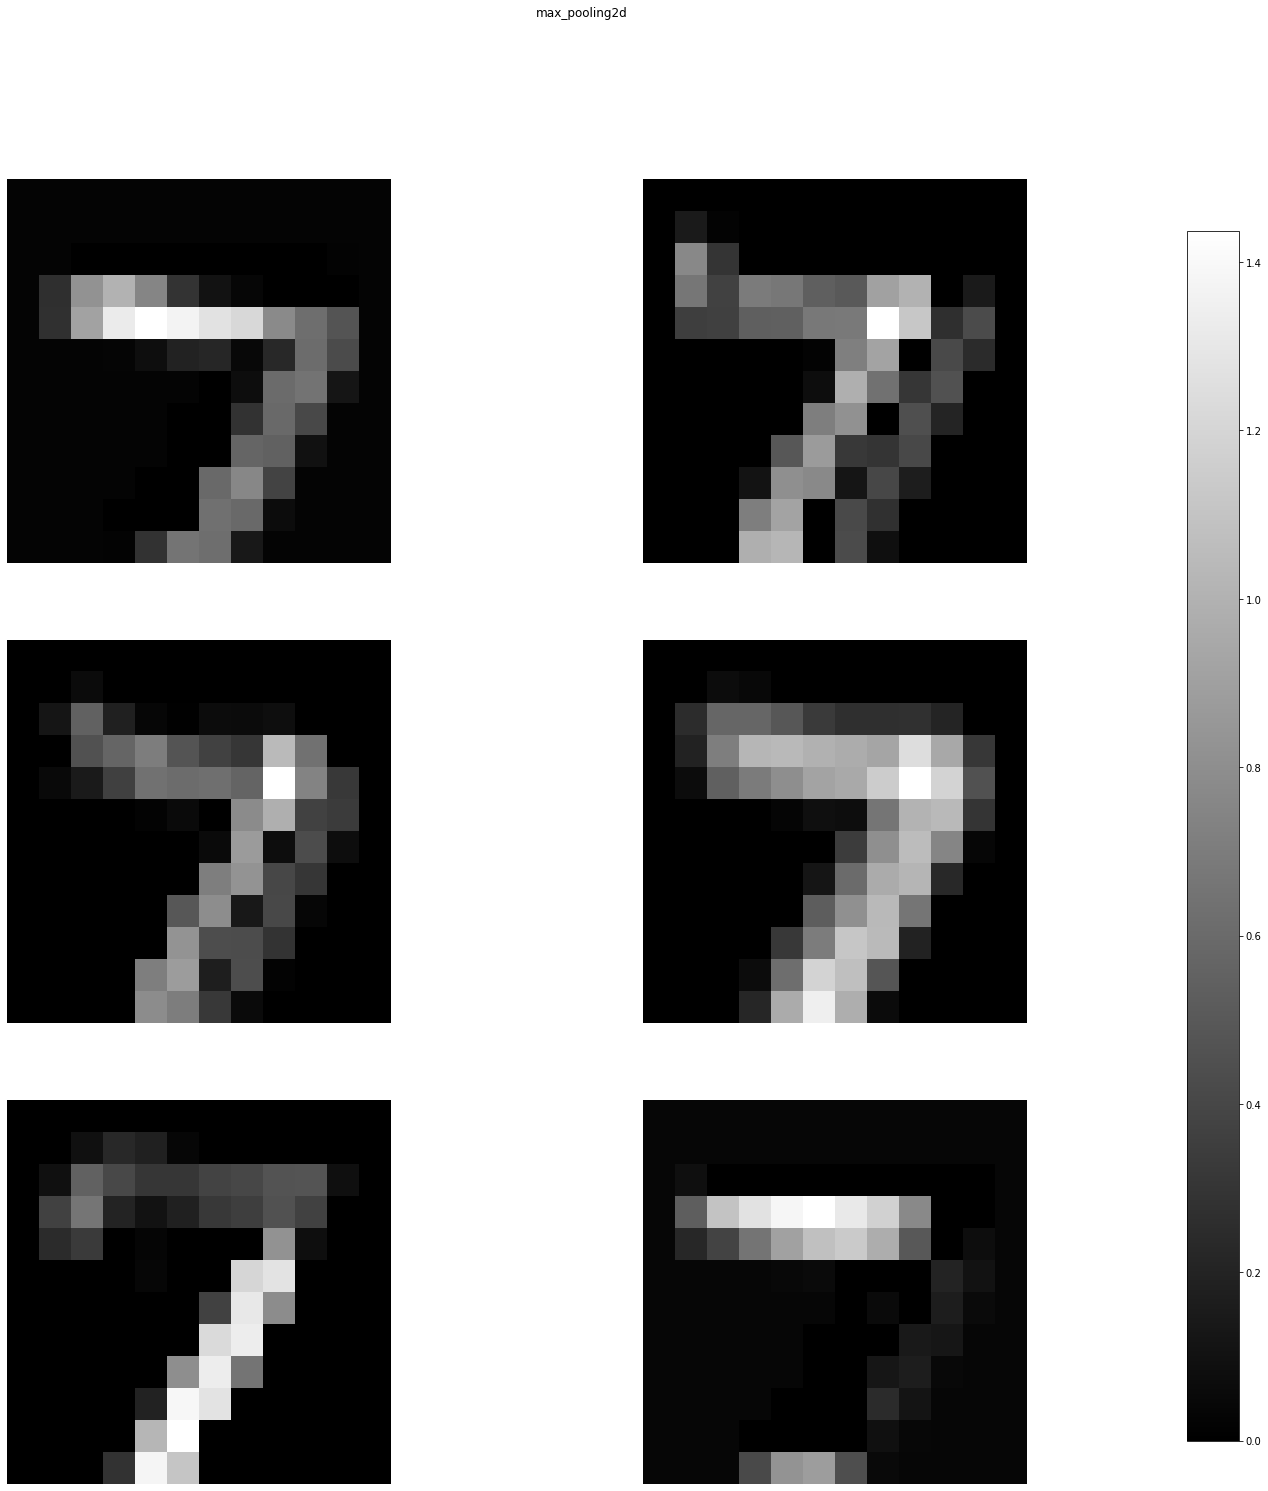

conv2d_1 (1, 8, 8, 10) 


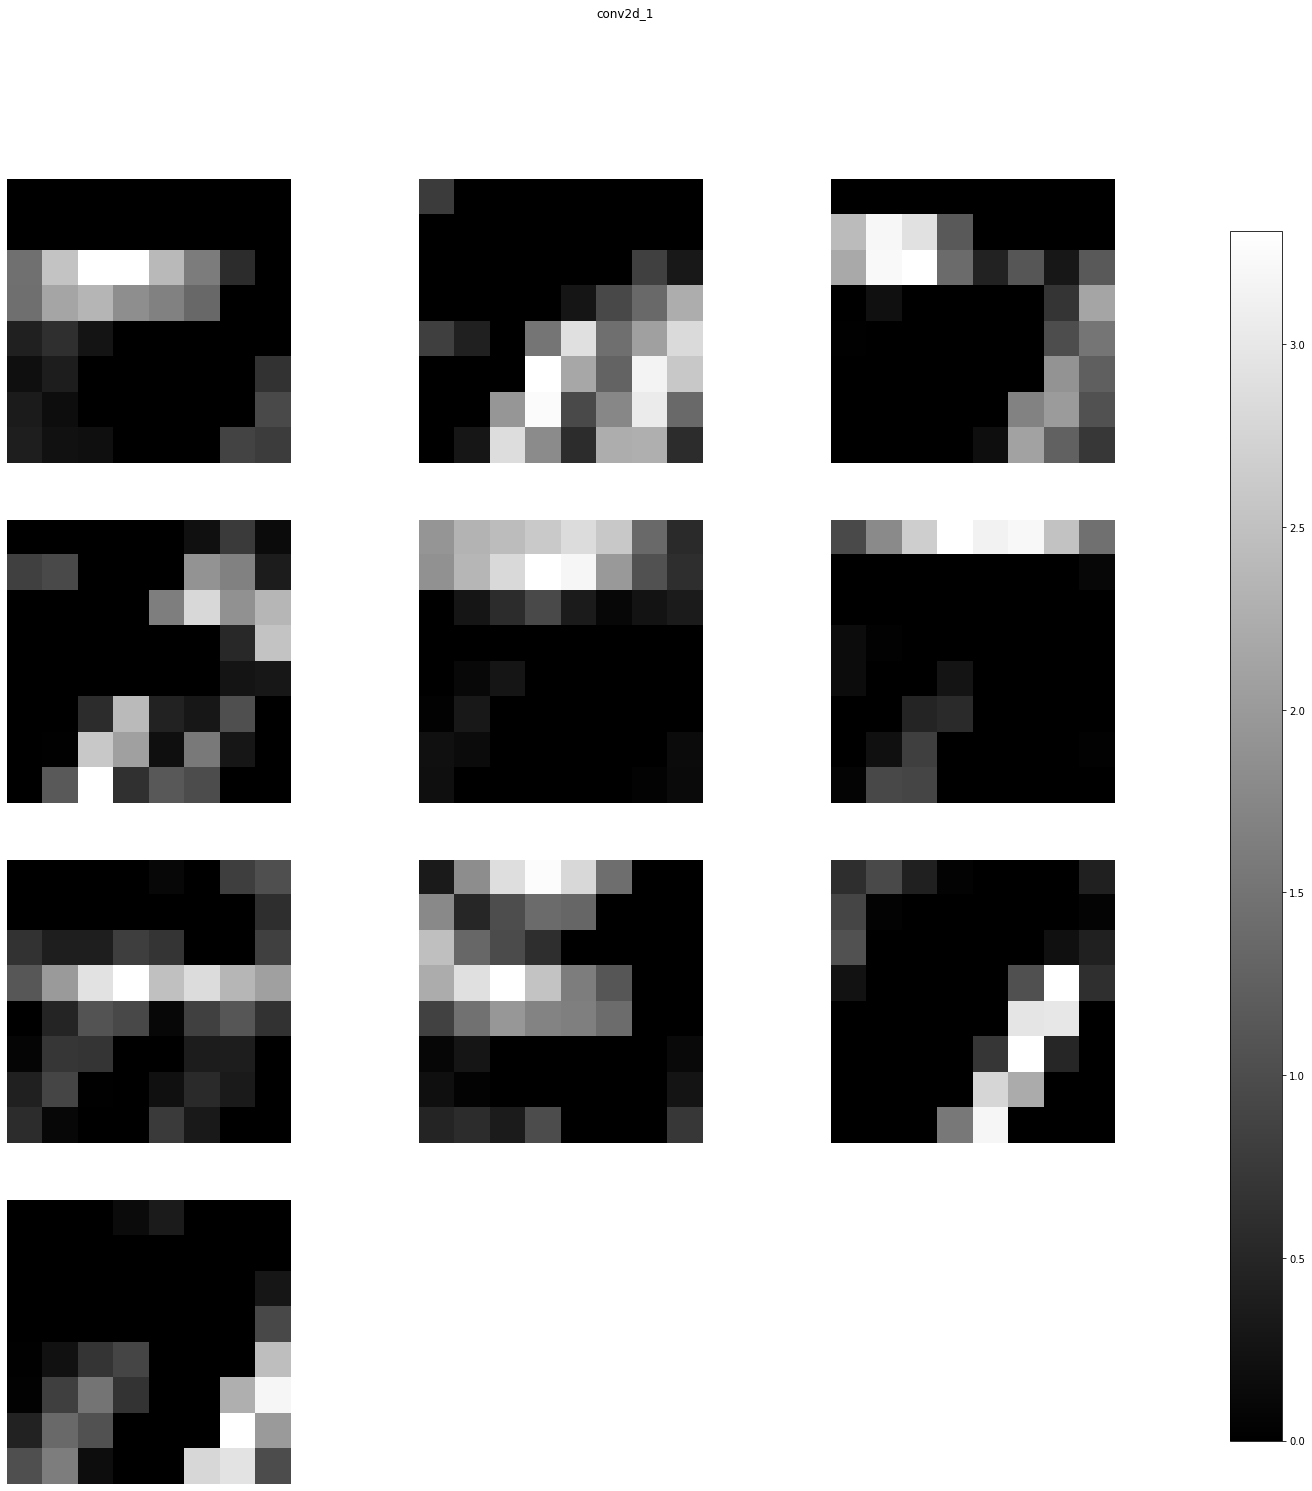

flatten (1, 640) 


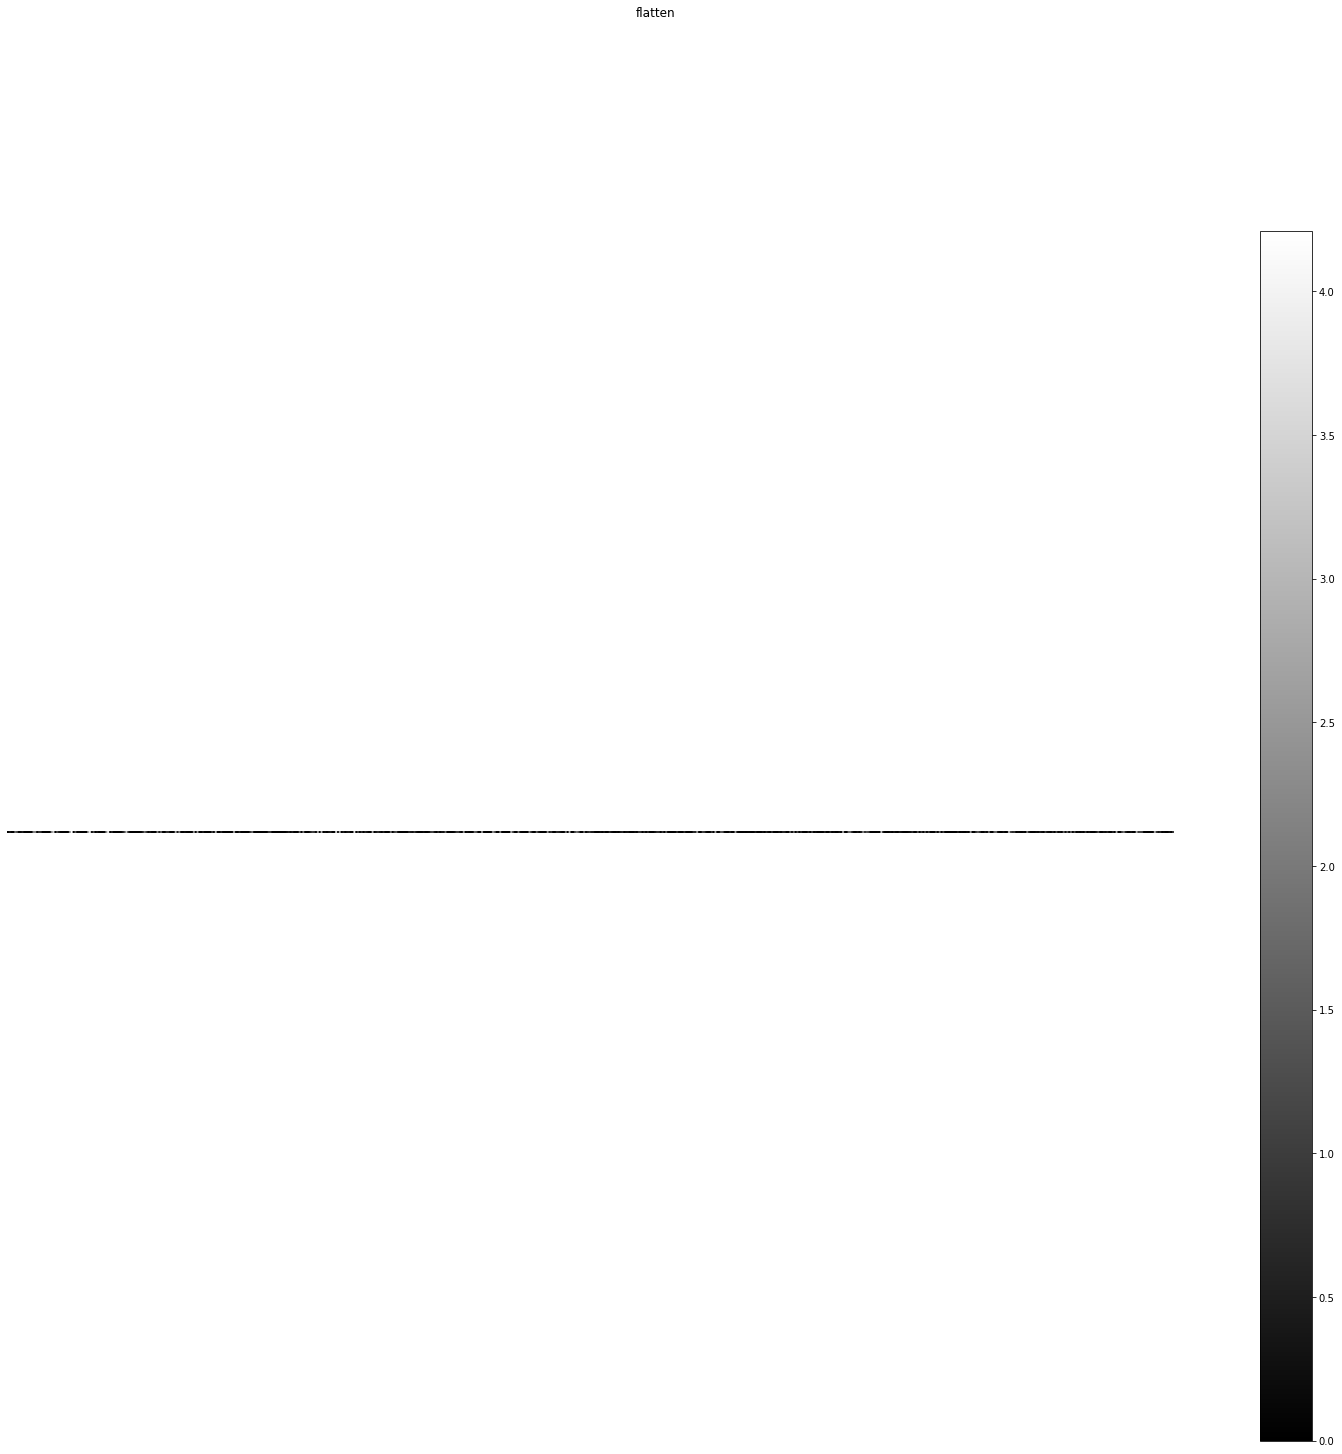

dense (1, 256) 


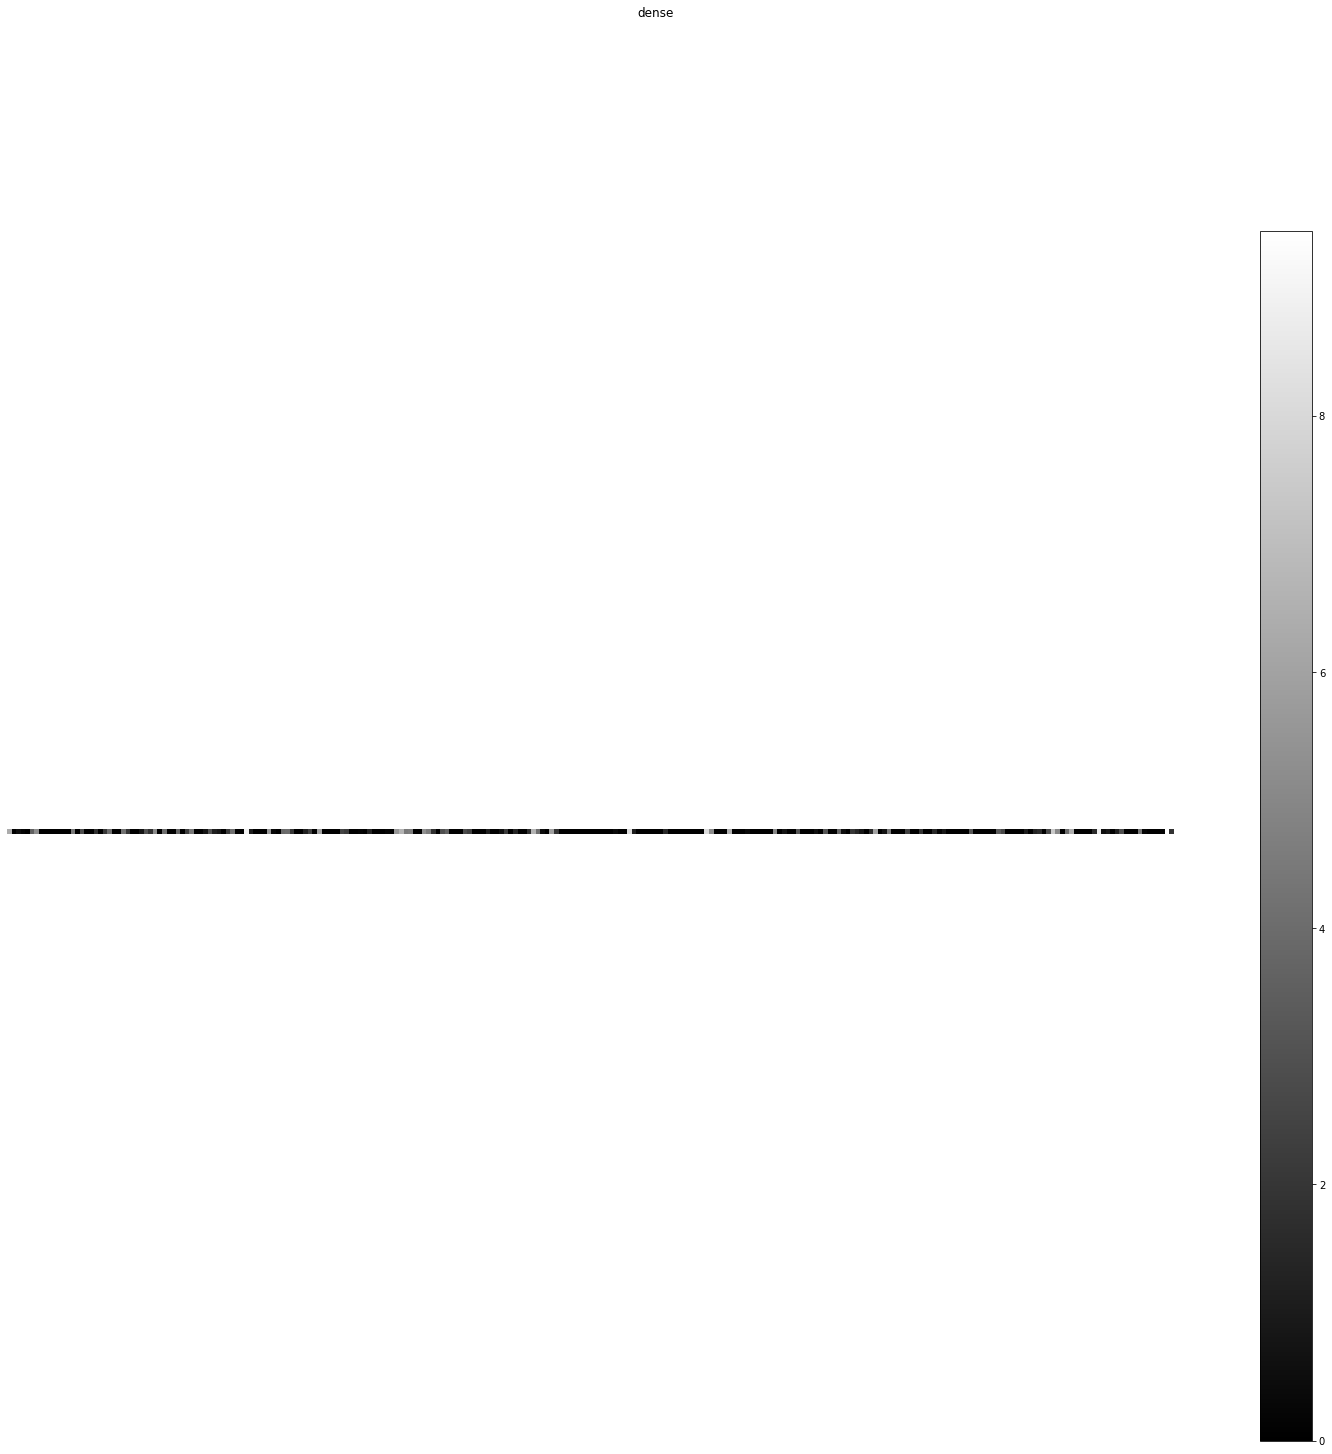

dense_1 (1, 10) 


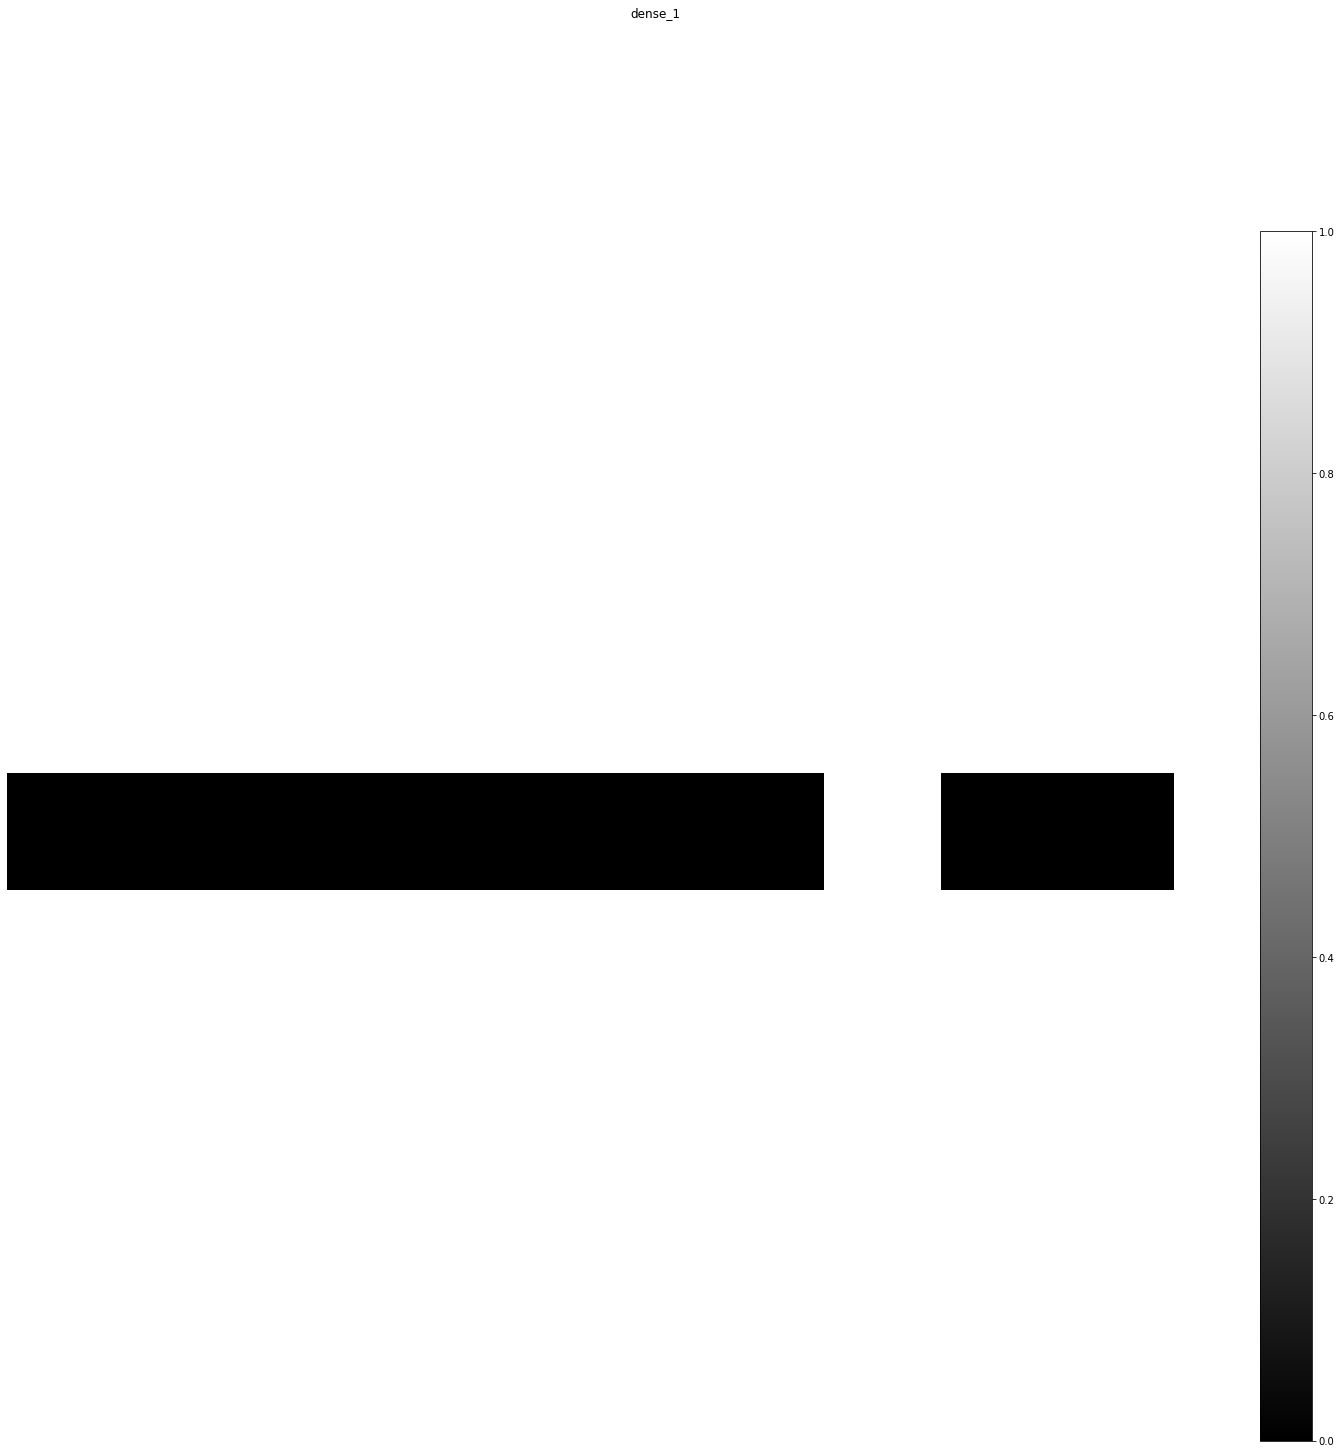

In [10]:
# Визуализируем активации с помощью keract.
# С помощью array slicing выделяем первый элемент из массива. (Результат должен также быть массивом.)
inputs = input_test[:1]
activations = get_activations(model, inputs)
display_activations(activations, cmap="gray", save=False)

conv2d_input (1, 28, 28, 1) 


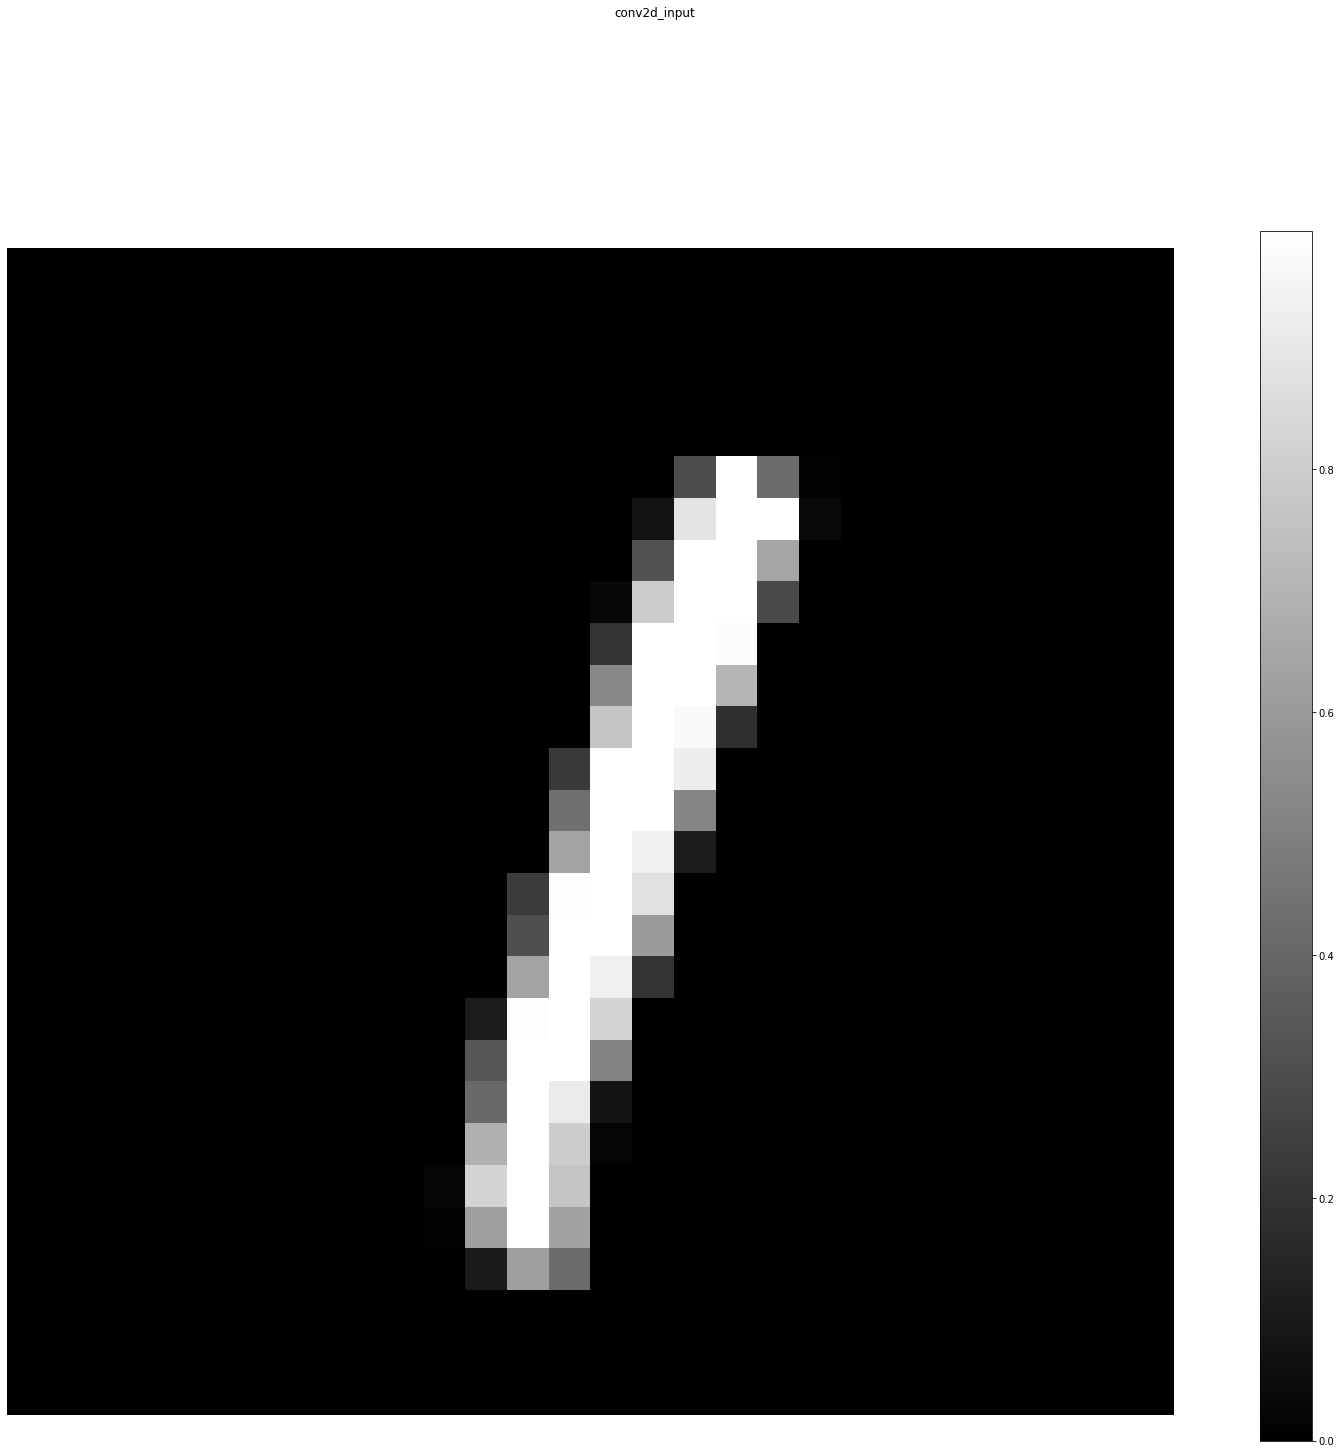

conv2d (1, 24, 24, 6) 


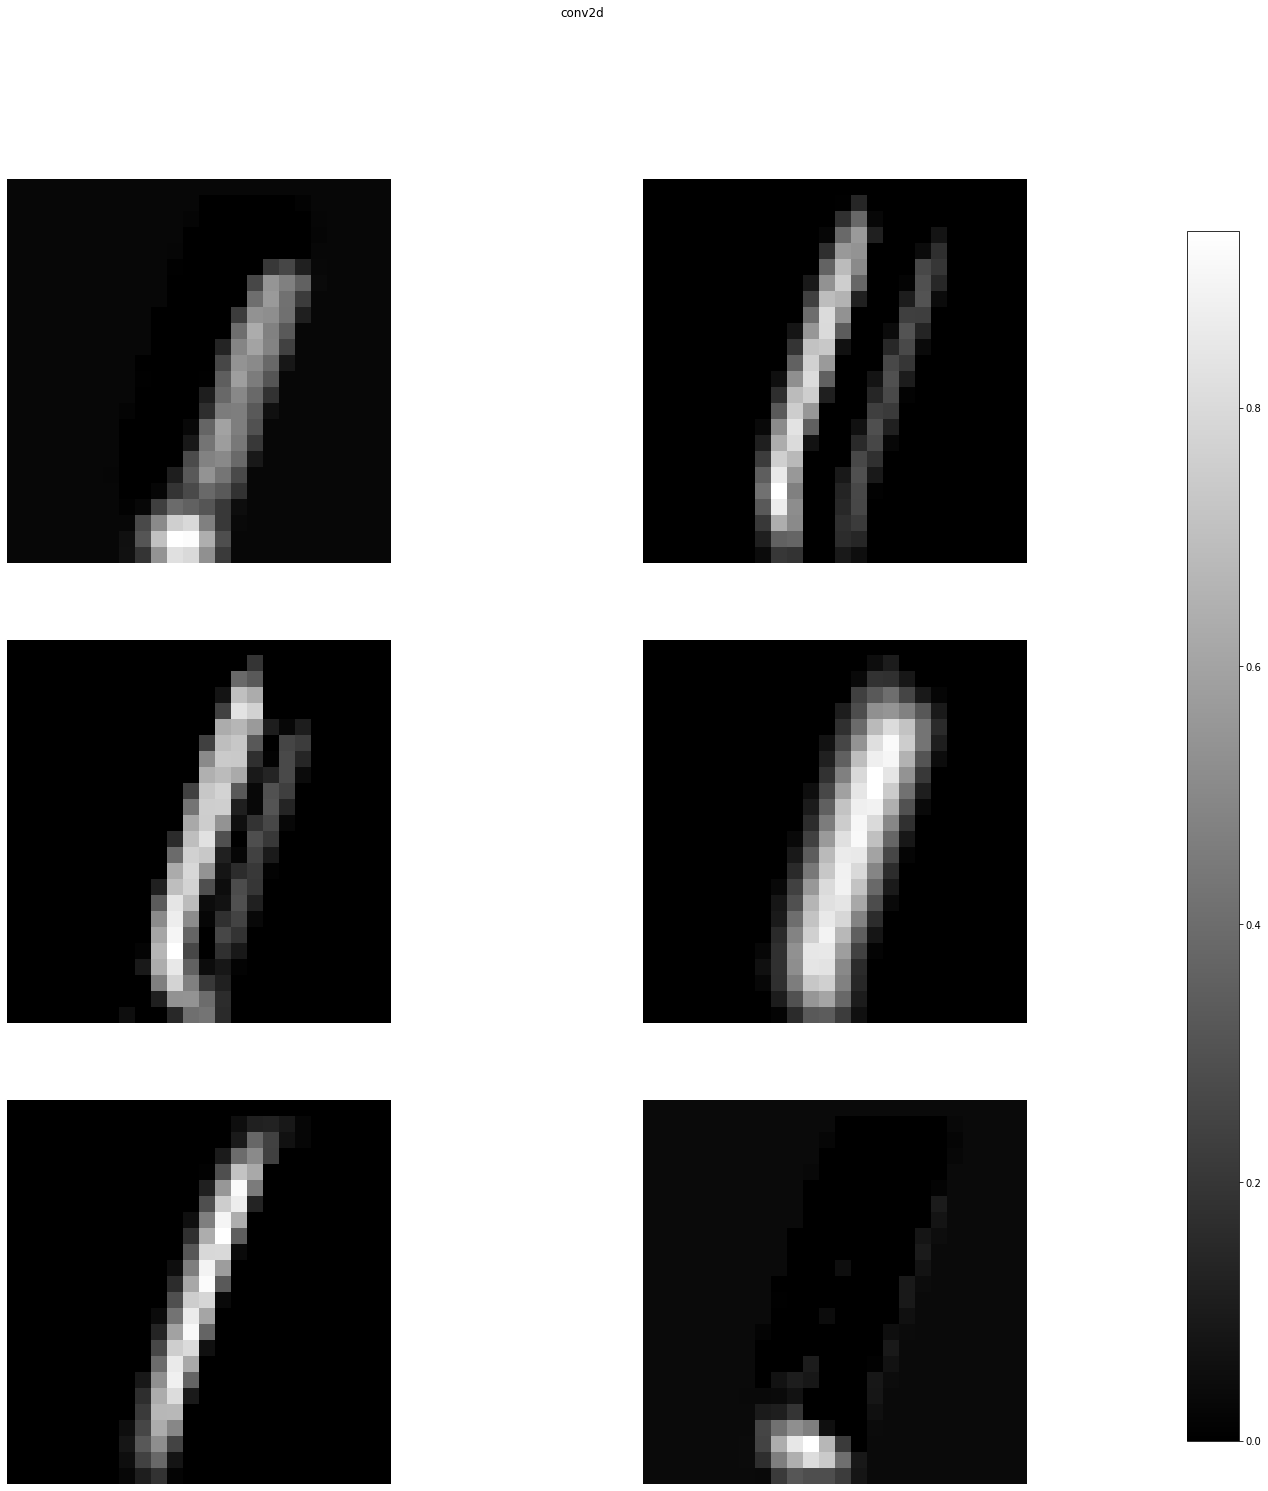

max_pooling2d (1, 12, 12, 6) 


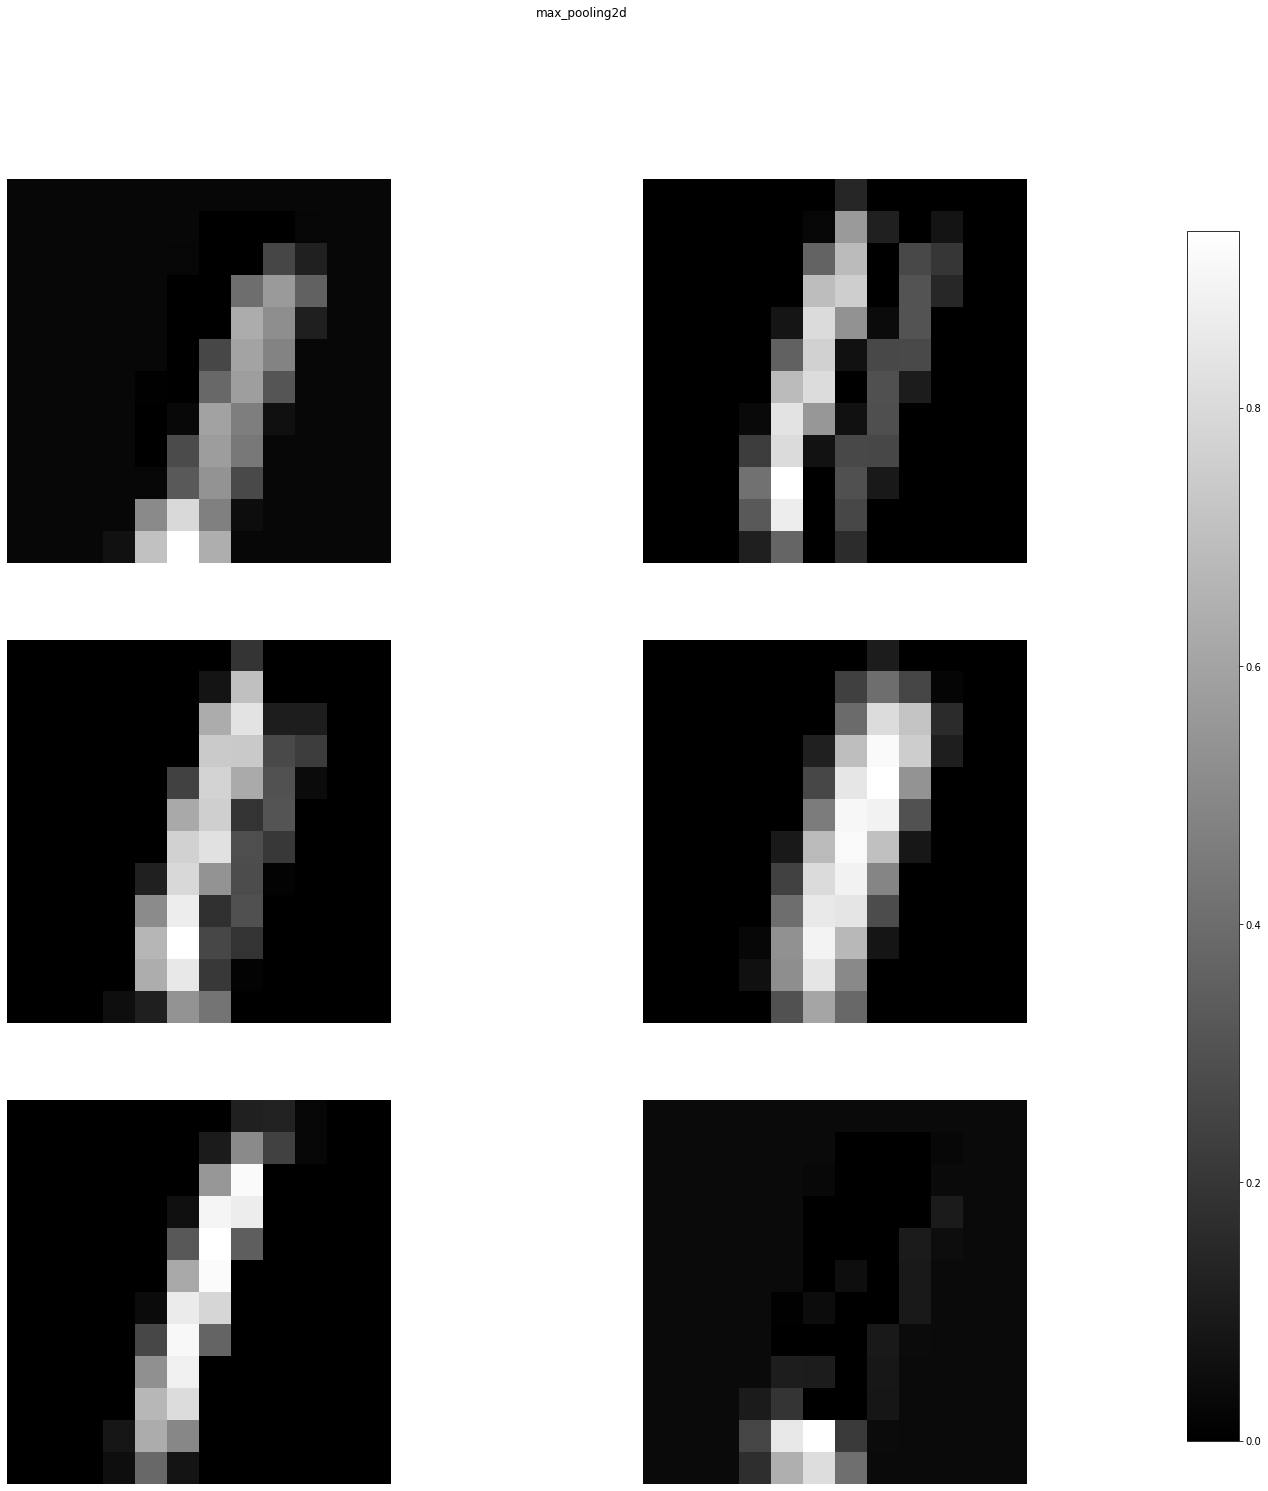

conv2d_1 (1, 8, 8, 10) 


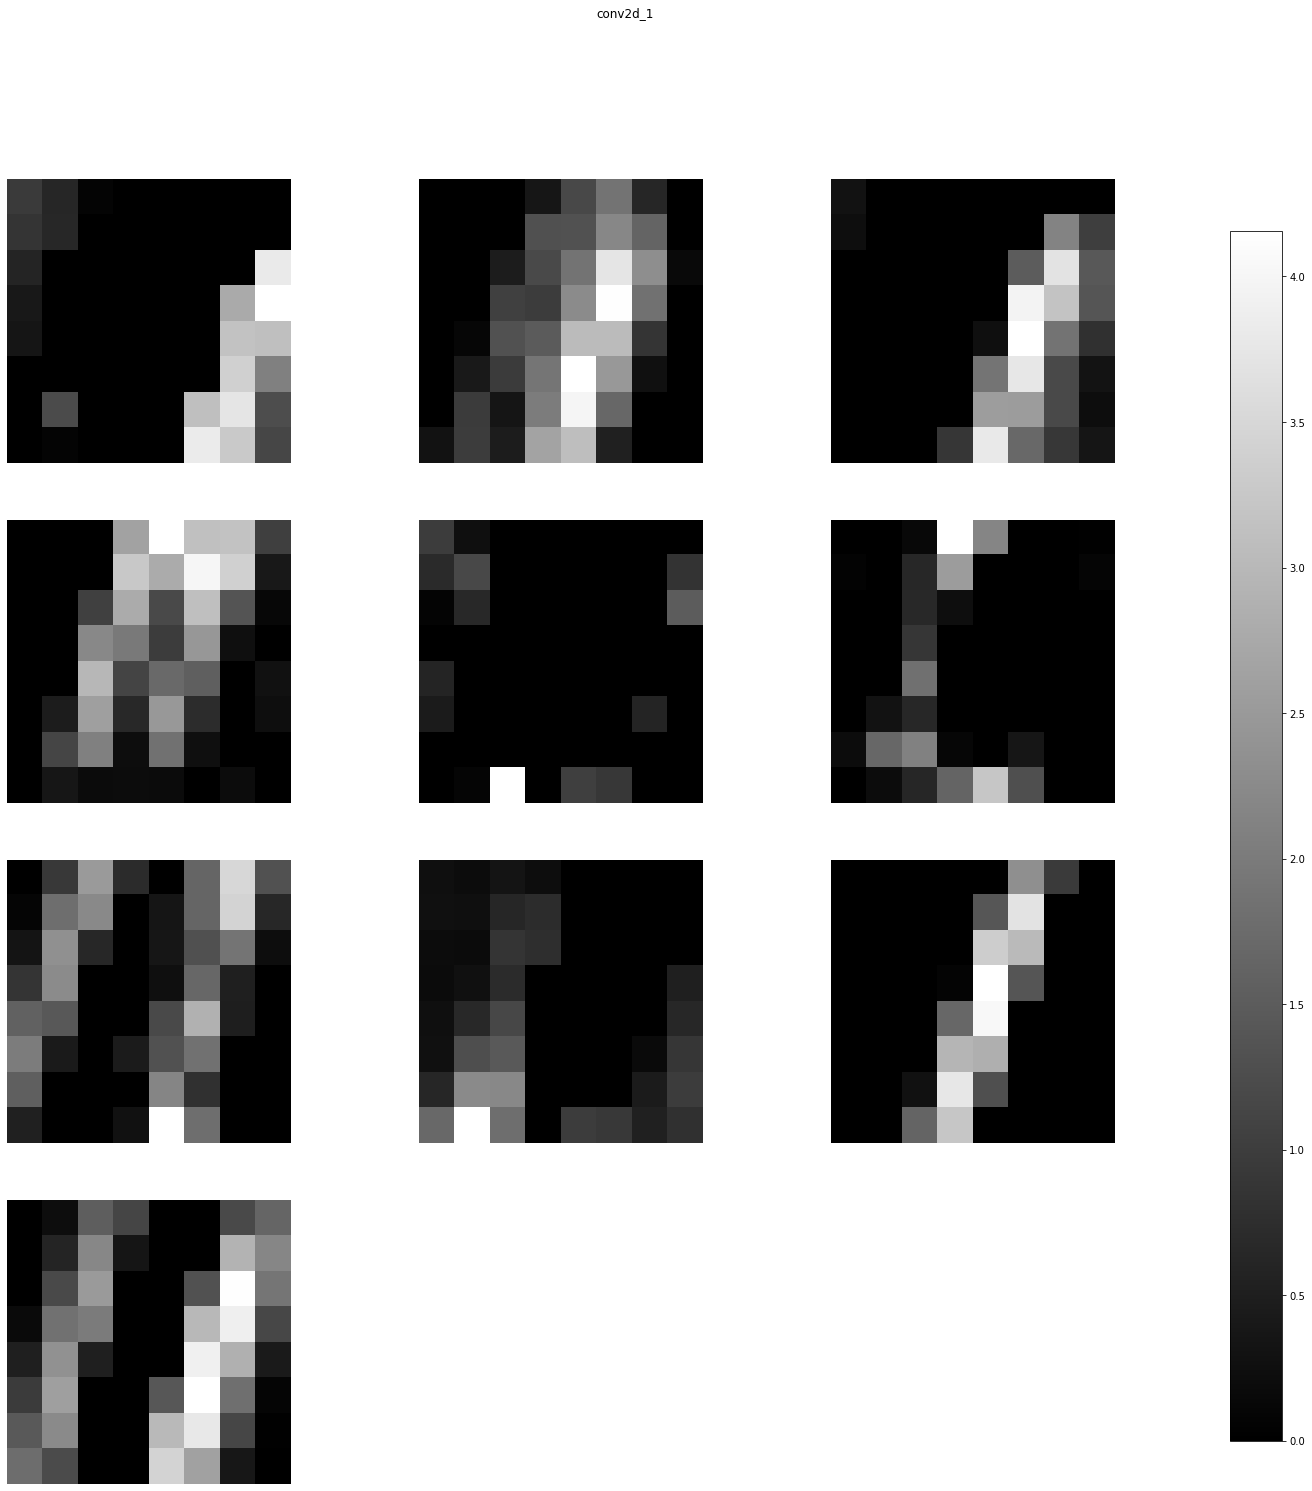

flatten (1, 640) 


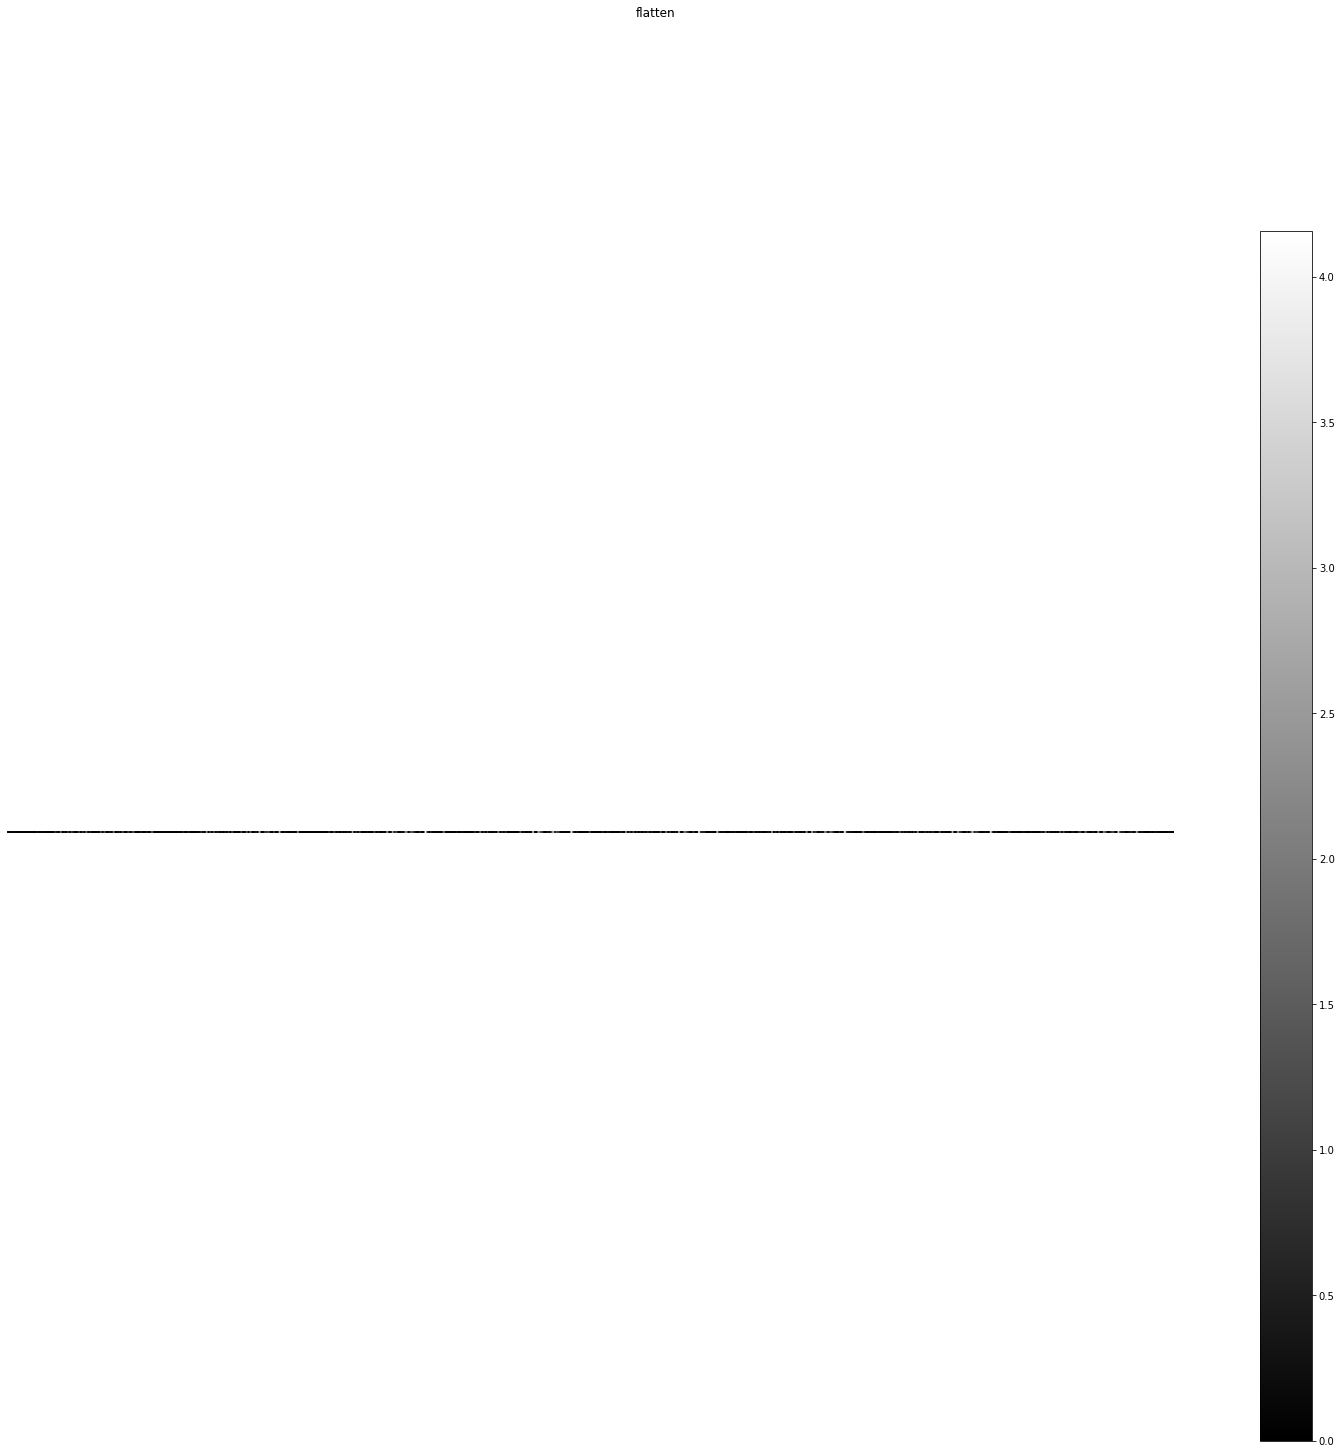

dense (1, 256) 


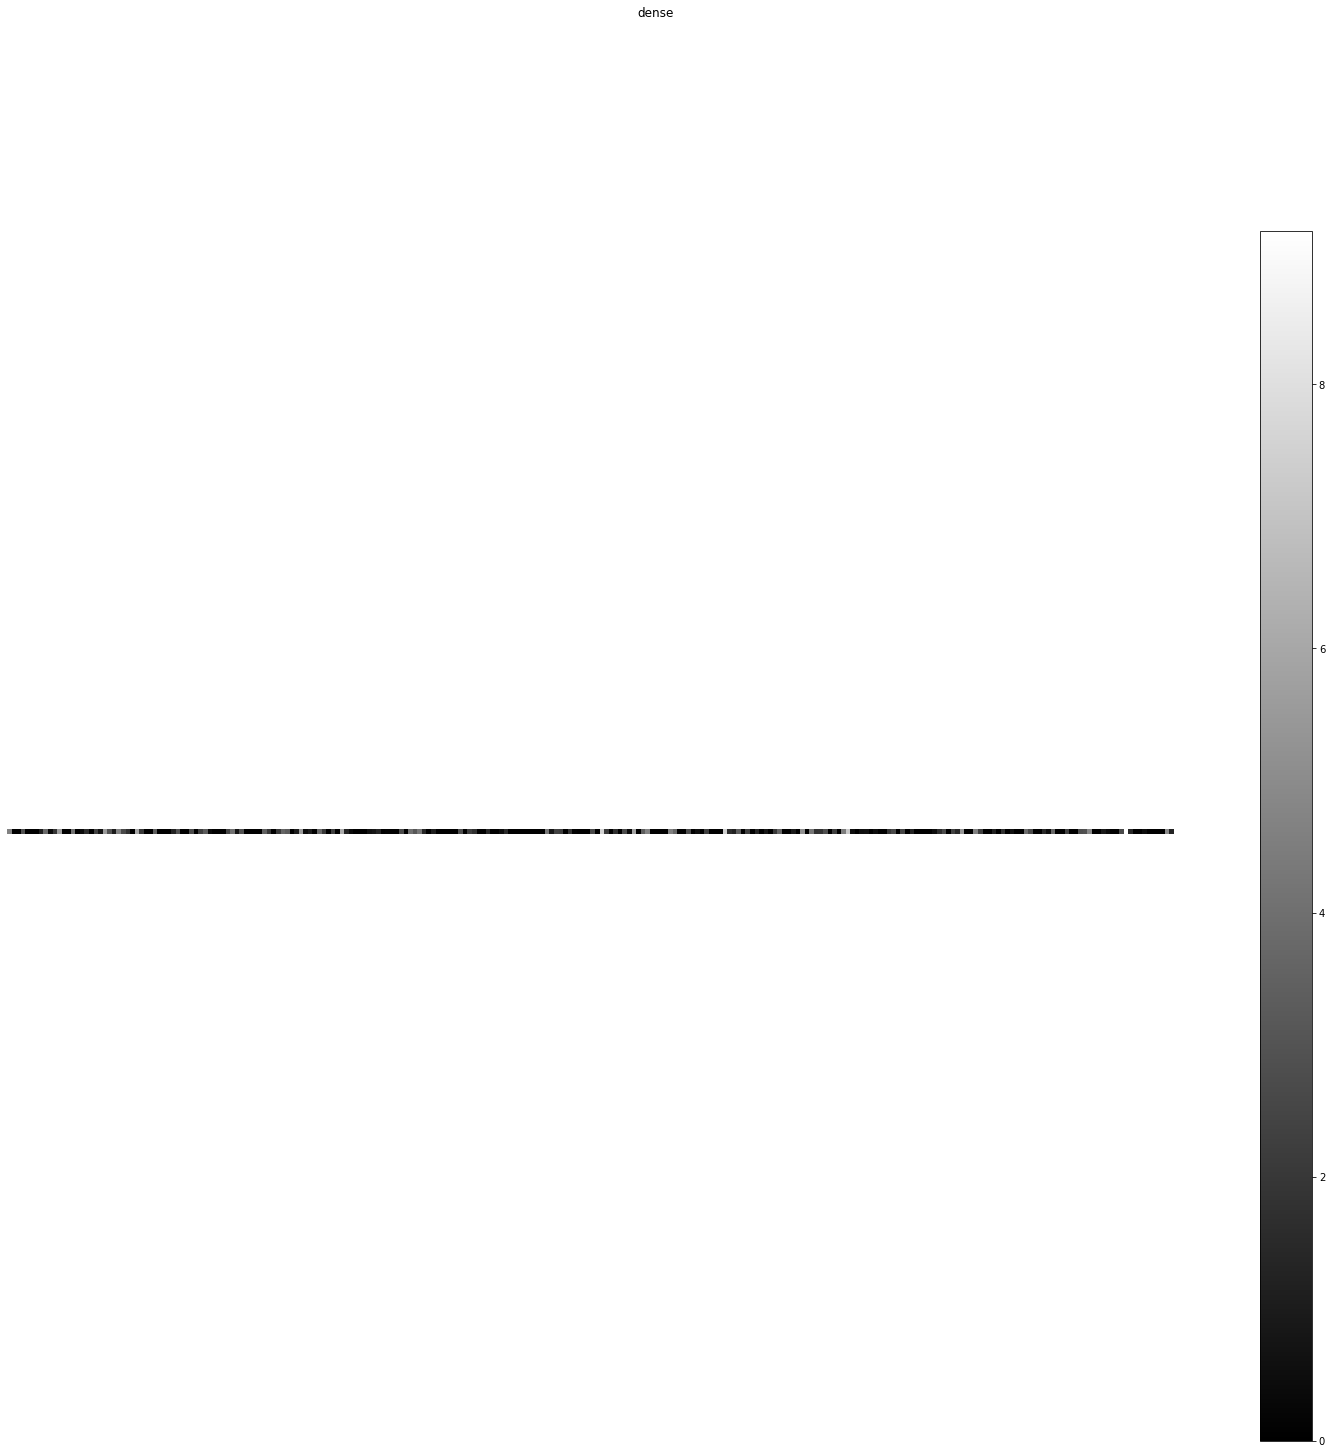

dense_1 (1, 10) 


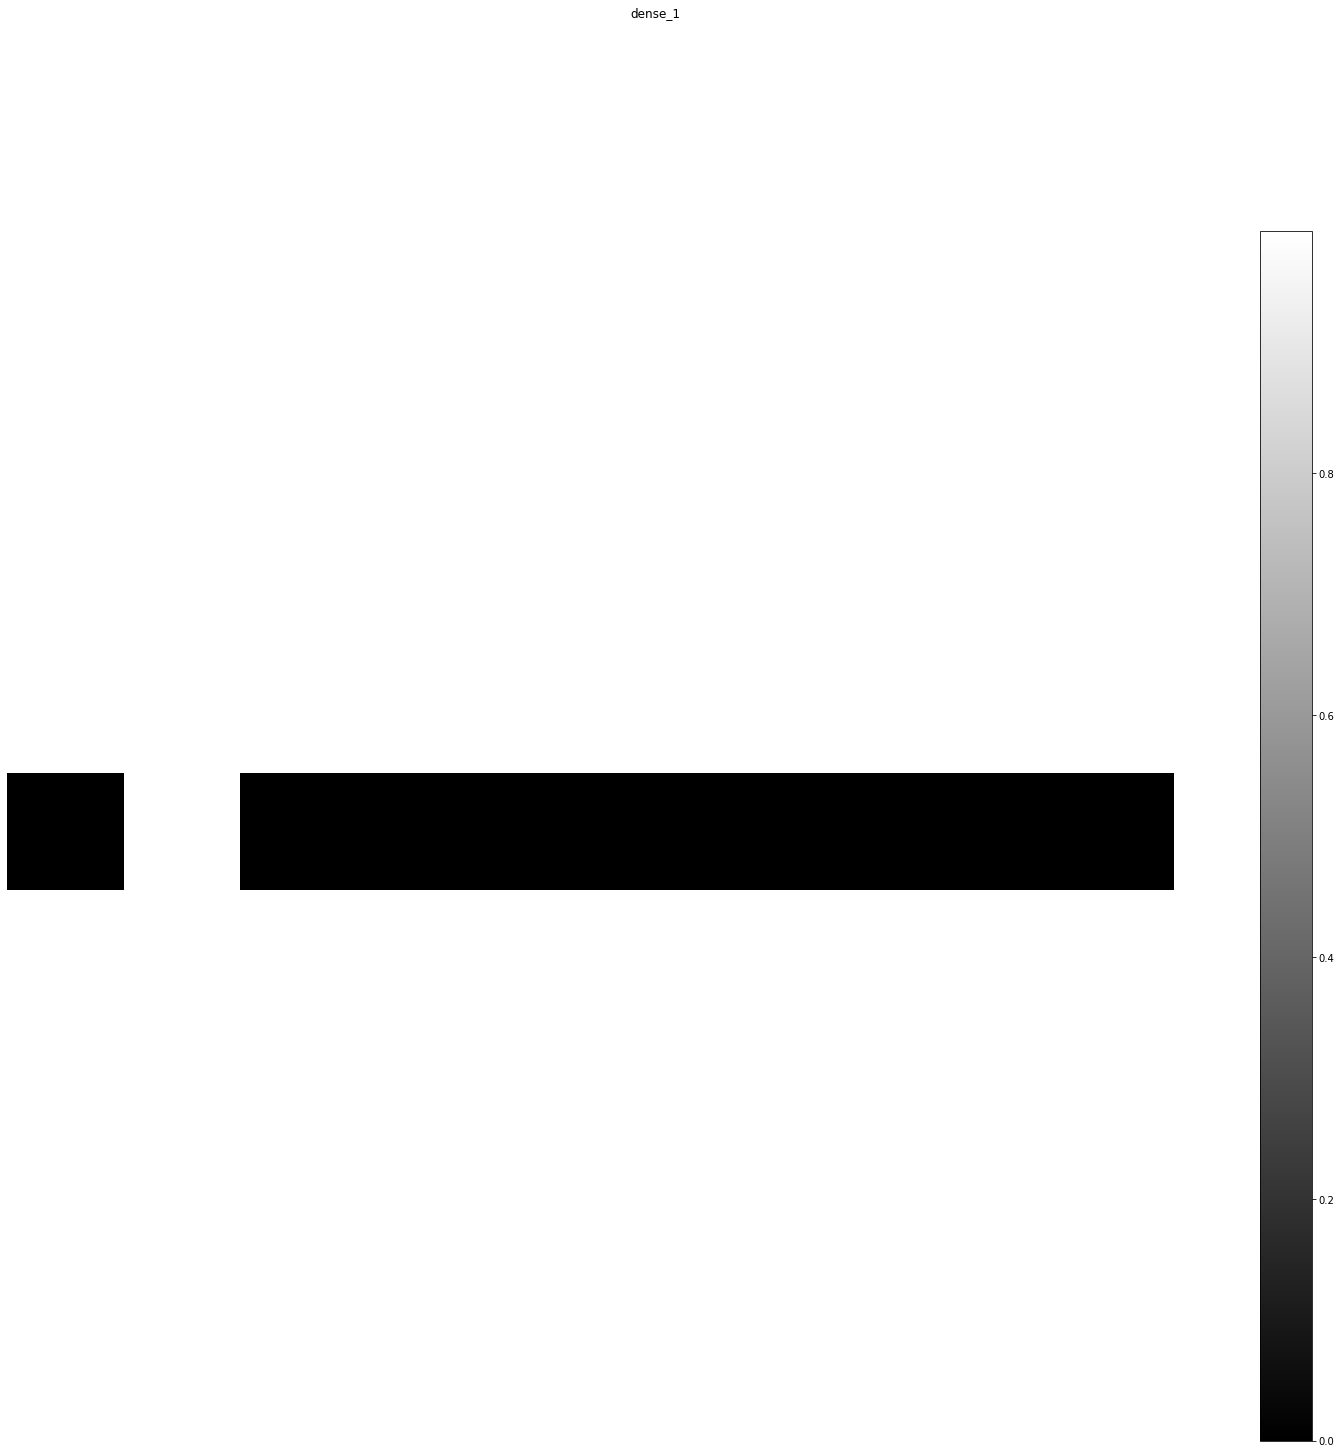

In [11]:
# Визуализируем активации с помощью keract.
# С помощью array slicing выделяем ещё какой-нибудь элемент из массива. (Результат должен также быть массивом.)
keract_inputs = input_test[5:6]
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)